In [1]:
# Descriptive analysis of handwritten ZIP digits 
# I will be using a dataset provided with “The Elements of Statistical Learning: 
# Data Mining, Inference, and Prediction” by Trevor Hastie, Robert Tibshirani & Jerome Friedman 
# 
# https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.info.txt
# https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz
# https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz
#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read CSV file, do *not* use first line as a header, recognize white space character as a field separator 
# see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [4]:
# Display the first 10 lines of data to get a first impression 
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN
5,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
6,3.0,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
8,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0,NaN
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN


In [5]:
# Row 0 holds the value of the integer represented by the following 256 values of gray scale 
# Row 257 is NaN because all lines end in a white space character 

In [6]:
# Lose the last column 
del data[257]

In [7]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,3.0,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [8]:
# Convert the values in row 0 to integers 
a = data.iloc[0,:].apply(np.int32)

In [9]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,3.0,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [10]:
# Take the first line of data as a sample
sample = (data.iloc[0,1:256])

In [11]:
# Print the sample 
sample

1     -1.000
2     -1.000
3     -1.000
4     -1.000
5     -1.000
6     -1.000
7     -1.000
8     -0.631
9      0.862
10    -0.167
11    -1.000
12    -1.000
13    -1.000
14    -1.000
15    -1.000
16    -1.000
17    -1.000
18    -1.000
19    -1.000
20    -1.000
21    -1.000
22    -1.000
23    -0.992
24     0.297
25     1.000
26     0.307
27    -1.000
28    -1.000
29    -1.000
30    -1.000
       ...  
226   -1.000
227   -1.000
228   -0.483
229    0.813
230    1.000
231    1.000
232    1.000
233    1.000
234    1.000
235    1.000
236    0.219
237   -0.943
238   -1.000
239   -1.000
240   -1.000
241   -1.000
242   -1.000
243   -1.000
244   -1.000
245   -0.974
246   -0.429
247    0.304
248    0.823
249    1.000
250    0.482
251   -0.474
252   -0.991
253   -1.000
254   -1.000
255   -1.000
Name: 0, Length: 255, dtype: float64

In [12]:
images = pd.DataFrame(data.iloc[0:1,1:257])

In [13]:
images.shape

(1, 256)

In [14]:
image_reshaped = images.values.reshape((16,16))

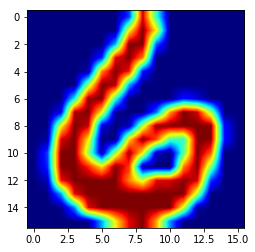

In [19]:
plt.imshow(image_reshaped, cmap='jet', interpolation='bilinear')
plt.show()

In [ ]:
data[data[0] == 6.0]

In [ ]:
digit_6 = pd.DataFrame(data[data[0] == 6.0])

In [ ]:
mean_image = pd.DataFrame(digit_6.iloc[:,1:257].mean())

In [ ]:
image_reshaped = mean_image.values.reshape((16,16))

In [ ]:
plt.imshow(image_reshaped, cmap='jet', interpolation='lanczos')
plt.show()